# Retail Sales Dataset


# Data Loading and Cleaning

In [5]:
import pandas as pd

In [6]:
# load the datasets
df = pd.read_csv("ds.csv")

# Data Dictionary

Transaction ID	String/Int	Unique identifier for each transaction.
Date	Date/Time	The date on which the transaction took place.
Customer ID	String/Int	Unique identifier for each customer.
Gender	String	Gender of the customer (e.g., Male, Female).
Age	Int	Age of the customer at the time of purchase.
Product Category	String	Category of the product purchased (e.g., Electronics, Clothing).
Quantity	Int	The number of units of the product purchased in that transaction.
Price per Unit	Float	Price of one unit of the product.
Total Amount	Float	Total amount for the transaction, calculated as (Quantity * Price per Unit).


In [4]:
#preview the dataset
print(df.head())

   Transaction ID        Date Customer ID  Gender  Age Product Category  \
0               1  24-11-2023     CUST001    Male   34           Beauty   
1               2  27-02-2023     CUST002  Female   26         Clothing   
2               3  13-01-2023     CUST003    Male   50      Electronics   
3               4  21-05-2023     CUST004    Male   37         Clothing   
4               5  06-05-2023     CUST005    Male   30           Beauty   

   Quantity  Price per Unit  Total Amount  
0         3              50           150  
1         2             500          1000  
2         1              30            30  
3         1             500           500  
4         2              50           100  


In [8]:
# datatype information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    1000 non-null   int64 
 1   Date              1000 non-null   object
 2   Customer ID       1000 non-null   object
 3   Gender            1000 non-null   object
 4   Age               1000 non-null   int64 
 5   Product Category  1000 non-null   object
 6   Quantity          1000 non-null   int64 
 7   Price per Unit    1000 non-null   int64 
 8   Total Amount      1000 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 70.4+ KB


In [9]:
# checking the columns in table
df.columns

Index(['Transaction ID', 'Date', 'Customer ID', 'Gender', 'Age',
       'Product Category', 'Quantity', 'Price per Unit', 'Total Amount'],
      dtype='object')

In [10]:
# checking for missing value
df.isnull().sum()

Transaction ID      0
Date                0
Customer ID         0
Gender              0
Age                 0
Product Category    0
Quantity            0
Price per Unit      0
Total Amount        0
dtype: int64

In [11]:
# checking for duplicate value
df.duplicated().sum()

0


# Descriptive Statistics

#Calculate descriptive stastics for relent colums

In [12]:
mean_quantity = df['Quantity'].mean()

In [13]:
medium_amount = df['Total Amount'].median()

In [14]:
model_category = df['Product Category'].mode()[0]

In [15]:
std_price = df['Price per Unit'].std()

#Display summary statistics for numeric colums

In [16]:
print(df[['Quantity','Total Amount','Product Category','Price per Unit']].describe())

          Quantity  Total Amount  Price per Unit
count  1000.000000   1000.000000     1000.000000
mean      2.514000    456.000000      179.890000
std       1.132734    559.997632      189.681356
min       1.000000     25.000000       25.000000
25%       1.000000     60.000000       30.000000
50%       3.000000    135.000000       50.000000
75%       4.000000    900.000000      300.000000
max       4.000000   2000.000000      500.000000


# Time Series Anylysis

In [17]:
import matplotlib.pyplot as plt

In [18]:
#Convert the 'Date' column to datetime
df['Date'] = pd.to_datetime(df['Date'])

C:\Users\prati\AppData\Local\Temp\ipykernel_22012\736785903.py:2: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['Date'] = pd.to_datetime(df['Date'])


In [19]:
#set Date as index for time series analysis
df.set_index('Date',inplace=True)

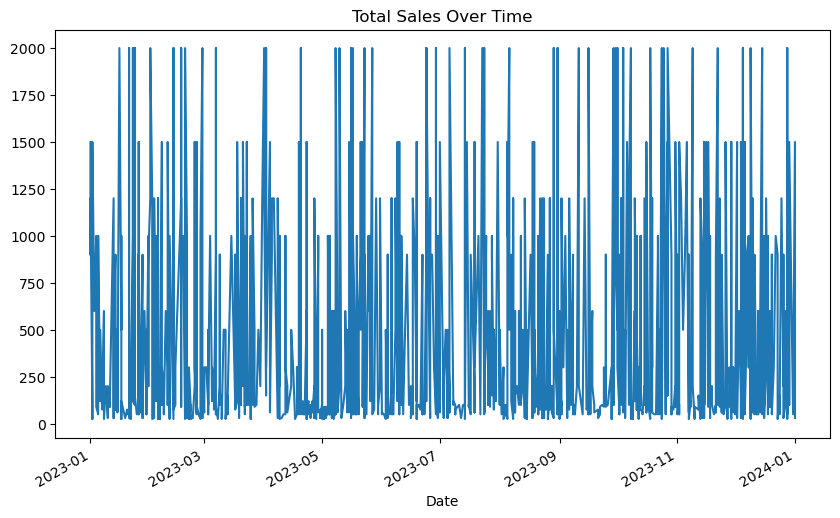

In [20]:
#Plot total sales over time
df['Total Amount'].plot(figsize=(10,6),title="Total Sales Over Time")
plt.show()

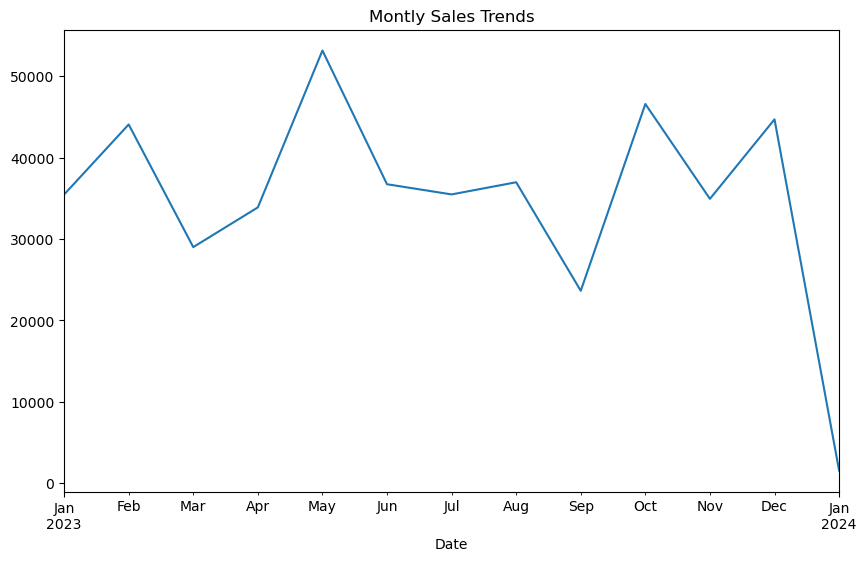

In [39]:
#Resample date by month to analyze monthly sales trends
monthly_sales = df['Total Amount'].resample('M').sum()
monthly_sales.plot(title="Montly Sales Trends",figsize=(10,6))
plt.show()

# Customer and Product Analysis

In [40]:
#Sales by Gender
gender_sales = df.groupby('Gender')['Total Amount'].sum()

In [42]:
#Sales by Age
age_sales = df.groupby('Age')['Total Amount'].sum()

In [43]:
#Sales by Product Category
product_sales = df.groupby('Product Category')['Total Amount'].sum()

In [48]:
#Top 10 customers (by Total Amount)
top_customers = df.groupby('Customer ID')['Total Amount'].sum().sort_values(ascending=False).head(10)

#Display results

In [49]:
print("Sales by Gender:\n",gender_sales)

Sales by Gender:
 Gender
Female    232840
Male      223160
Name: Total Amount, dtype: int64


In [51]:
print("Sales by Age Group:\n",age_sales)

Sales by Age Group:
 Age
18    11215
19    14870
20     8645
21    12585
22    13700
23     8220
24     5415
25     9900
26    13980
27     9385
28     8670
29     6570
30     9790
31    10220
32     5550
33     6240
34    16785
35    11290
36     9105
37    11650
38    11100
39     4595
40     9415
41     5650
42     8500
43    17970
44     7560
45     6325
46    13090
47    12505
48     7240
49     5110
50     9845
51    16065
52     7040
53     9510
54    10505
55     9780
56     9440
57     9290
58     7395
59     9470
60    11590
61     6730
62     8120
63     9250
64     9125
Name: Total Amount, dtype: int64


In [53]:
print("Sales by Age Group:\n",age_sales)

Sales by Age Group:
 Age
18    11215
19    14870
20     8645
21    12585
22    13700
23     8220
24     5415
25     9900
26    13980
27     9385
28     8670
29     6570
30     9790
31    10220
32     5550
33     6240
34    16785
35    11290
36     9105
37    11650
38    11100
39     4595
40     9415
41     5650
42     8500
43    17970
44     7560
45     6325
46    13090
47    12505
48     7240
49     5110
50     9845
51    16065
52     7040
53     9510
54    10505
55     9780
56     9440
57     9290
58     7395
59     9470
60    11590
61     6730
62     8120
63     9250
64     9125
Name: Total Amount, dtype: int64


In [54]:
print("Top 5 Product Categories:\n",product_sales.sort_values(ascending=False).head(5))

Top 5 Product Categories:
 Product Category
Electronics    156905
Clothing       155580
Beauty         143515
Name: Total Amount, dtype: int64


# Visualization

In [2]:
import seaborn as sns

In [4]:
#Bar chart for sales by product category
product_sales.plot(kind='bar',title="Sales by Product Category",figsize=(10,6))
plt.show()

NameError: name 'product_sales' is not defined

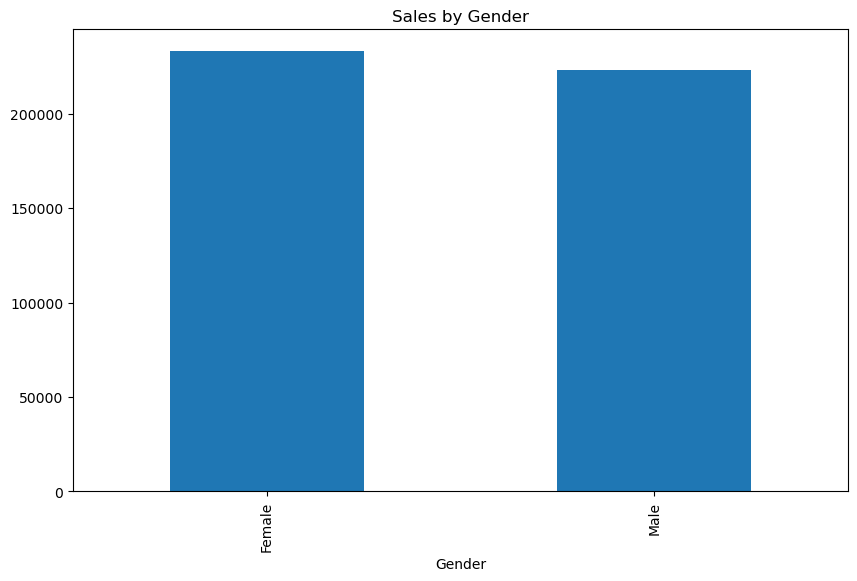

In [57]:
#Bar chart for sales by gender
gender_sales.plot(kind='bar',title="Sales by Gender",figsize=(10,6))
plt.show()

In [1]:
sns.histplot(df['Total Amount'])

NameError: name 'sns' is not defined

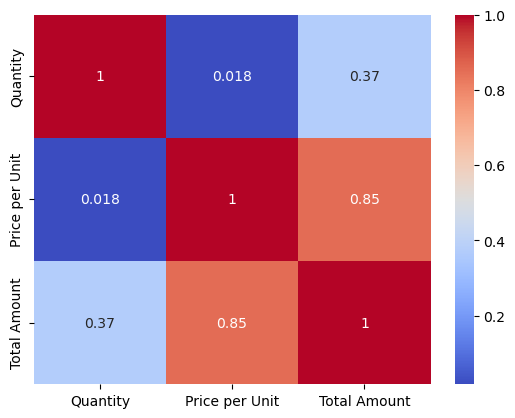

In [60]:
#Correlation heatmap between numerical columns
corr = df[['Quantity', 'Price per Unit', 'Total Amount']].corr()
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.show()